**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Jiaqi Wu
- Ella Wen
- Zihao Yang
- Yunqi Zhang
- Zhining Zhang

# Research Question

#### How do factors such as course difficulty, instructor quality, and course level (lower vs. upper division) correlate with student satisfaction scores in UCSD STEM courses, based on CAPE data from the 2020-2022 academic year?

The factors that may influence the likelihood of students recommending a class include:

- Instructor Quality: Indicated by the percentage of students recommending the instructor.

- Course Difficulty: Implied by the average number of hours spent studying per week.

- Grade Expectations vs. Actual Grades: Measured by the difference between expected and received GPA.

- Number of Evaluations: A higher number provides a more reliable recommendation rate.

- Enrollment Size: Larger class sizes may impact instruction quality and student engagement.

- Term and Course Context: Course content, teaching methods, and term-specific factors may influence recommendations.

## Background and Prior Work


When students at UCSD register for courses on WebReg each quarter, we often rely on Course and Professor Evaluations (CAPEs) to make our decisions. This online evaluation provides us insight on various aspects of a course, such as instructor, workload, and expected vs. received grades. One of the key categories within CAPE is the recommendation rate of the class, which is the percentage of students who would recommend a course to others. However, it remains unclear which factors have the most significant impact on a student’s likelihood of recommending a course.

For this project, we aim to analyze the correlation between CAPE recommendation rates and other CAPEs factors, such as instructor ratings, expected vs. received grades, study hours per week, and overall course enrollment. This can help us better select the courses.

In this past project shown in Reference #1, a group of UCSD students in COGS108 conducted research on past CAPE data, focusing on identifying the key factors that influence the average GPA of a class at UCSD. Their study explored correlations between expected and actual GPAs, study time, class/professor evaluations, and GPA trends across different fields and course levels. One of their notable findings was that upper-division classes tend to have higher average GPAs than lower-division classes, challenging common assumptions about course difficulty.

While their project primarily aimed to understand GPA predictors and their implications for university policies, our research takes a different approach by focusing on the factors that influence students' likelihood of recommending a class in CAPEs. Instead of analyzing the average GPA received by students, we examine the recommendation rate of a class to understand what aspects contribute to a positive course evaluation. However, like their study, our research also relies on CAPE survey data, making their findings a relevant reference for understanding broader academic trends at UCSD.

Prior studies in Reference #2 have explored various aspects of student course selection. Dahl et al. (2022) examined how student attitudes towards the class, class recommendation rate, and perceived behavioral control impact their decision to enroll in a course. This provides a similar approach to our question, what factors influenced the class recommendation rate. It aligns with our hypothesis that instructor quality, expected workload, and grading play a major role in student's satisfication. 



References (include links):
- 1) https://github.com/COGS108/FinalProjects-Sp23/blob/main/FinalProjectGroup_Sp23_DigitSapiens.ipynb
- 2) https://nactajournal.org/index.php/nactaj/article/view/138
- 3) https://github.com/UCSD-Historical-Enrollment-Data/UCSDHistEnrollData.git/ 

# Hypothesis



Instructor recommendation ratings, course difficulty, grade expectations, and enrollment size are significant predictors of class recommendation rates in UCSD STEM courses.
Specifically:

Courses with higher instructor recommendation ratings will have higher class recommendation rates.

Courses with lower perceived difficulty (fewer study hours per week) will have higher class recommendation rates.

Courses where students’ actual grades meet or exceed their expectations will have higher class recommendation rates.

Smaller enrollment sizes will correlate with higher class recommendation rates compared to larger enrollment sizes.


# Data

## Dataset CAPE Student Course Evaluations

- **Dataset Name:** CAPE Student Course Evaluations
- **Link to the dataset:** *https://github.com/UCSD-Historical-Enrollment-Data/UCSDHistEnrollData/blob/master/data/CAPEs.tsv*
- **Number of observations:** **61,791**
- **Each observation is described by 11 variables, including:**
  - instructor (String) – The name of the instructor for the course.
  - sub_course (String) – The course code (e.g., CSE 101, MATH 20A).
  - course (String) – The name of the course (e.g., "Data Structures", "Calculus I").
  - term (String) – The academic term during which the course was offered (e.g., "Fall 2021").
  - enroll (Integer) – The total number of students enrolled in the class.
  - evals_made (Integer) – The number of students who submitted evaluations for the course.
  - rcmd_class (Float, 0.0 - 100.0) – The percentage of students who recommend the class.
  - rcmd_instr (Float, 0.0 - 100.0) – The percentage of students who recommend the instructor.
  - study_hr_wk (Float) – The average number of hours students reported studying for the course per week.
  - avg_grade_exp (Float, 0.0 - 4.0) – The average GPA that students expected to receive in the class.
  - avg_grade_rec (String) – The average letter grade that students reported expecting (e.g., "A", "B+").

The **CAPE dataset** contains student evaluations of university courses until **2023**, capturing key insights into instructor effectiveness, course difficulty, and student workload. Each row represents a specific course-section taught by an instructor in a given term (e.g., FA22 for Fall 2022) and includes metrics such as enrollment numbers, evaluation counts, and recommendation percentages for both the course and instructor. Additionally, it records students' reported study hours per week and their expected vs. received GPA. Missing values in the **`avg_grade_rec`** column, originally represented as `-1`, have been removed to ensure data accuracy. With proper analysis, this dataset can be used to study student's staisfactory scores towards different courses over time.

###   Set up

In [1]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

import patsy
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind
# Load our data
file_path = "data/CAPEs.tsv"
df = pd.read_csv(file_path, sep="\t")

### Data Cleaning

We filtered the dataset to focus on the 2020-2022 academic years and cleaned the data by removing rows with invalid recommendation grades and any missing values.

In [2]:
# Our research question only focus between 2020 - 2022 academic years
time_frame = ['20', '21', '22']
df = df[df['term'].str[-2:].isin(time_frame)]

# Data Cleaning
df_cleaned = df[df['avg_grade_rec'] != -1]
df_cleaned = df_cleaned.dropna()

# Display the cleaned dataframe
df_cleaned

,instructor,sub_course,course,term,enroll,evals_made,rcmd_class,rcmd_instr,study_hr_wk,avg_grade_exp,avg_grade_rec
33,"Fortier, Jana",ANAR 100,Spec Topics/Anth Archaeology,FA22,20,3,100.0,100.0,3.17,3.33,3.30
36,"Goldstein, Paul S",ANAR 143,Biblical Arch,FA22,25,8,100.0,100.0,1.36,3.86,3.85
37,"Marchetto, Maria Carolina",ANBI 100,Special Topic/Biological Anth,FA22,30,14,100.0,100.0,1.93,4.00,3.99
41,"Gagneux, Pascal",ANBI 141,The Evolution of Human Diet,FA22,186,69,98.5,100.0,3.76,3.70,3.66
42,"Hrvoj Mihic, Branka",ANBI 145,Bioarchaeology,FA22,20,4,75.0,100.0,4.50,3.33,2.84
...,...,...,...,...,...,...,...,...,...,...,...
61786,"Gladstein, Jill M",SYN 1,Perspectives/Changing Planet,WI22,404,243,90.9,93.4,3.95,3.94,3.90
61787,"Gladstein, Jill M",SYN 2,Explorations/Changing Planet,WI22,191,93,77.0,88.5,4.18,3.79,3.89
61788,"Gladstein, Jill M",SYN 2,Explorations/Changing Planet,FA21,319,135,68.0,74.4,3.89,3.93,3.88
61789,"Gladstein, Jill M",SYN 1,Perspectives/Changing Planet,SP21,235,107,90.6,95.3,5.15,3.85,3.88


We defined a list of STEM course prefixes and filtered the dataset to include only courses from the STEM field based on the department.

In [3]:
# We defined a list of STEM courses prefix 
STEM = ['MATH', 'CHEM', 'BI', 'COGS', 'CSE', 'ECON', 'ECE', 'MAE', 'PHYS', 'DSC', 'BENG', 'NANO', 'CENG', 'SE']

# Filter for courses only in STEM field
df_cleaned['department'] = df_cleaned['sub_course'].astype(str).str.split().str[0]
cleaned_df_stem = df_cleaned[df_cleaned['department'].isin(STEM) | df_cleaned['department'].str.startswith('BI')]

We applied Min-Max normalization to the evals_made column and removed courses with too few evaluations (below the bottom 5% threshold).

In [4]:
# Use Min-Max Normalization to normalize the evals_made counts
cleaned_df_stem['evals_made'] = (cleaned_df_stem['evals_made'] - cleaned_df_stem['evals_made'].min()) / \
                                 (cleaned_df_stem['evals_made'].max() - cleaned_df_stem['evals_made'].min())

# Drop courses with too few evaluations made (Bottom 5% threshold)
threshold = cleaned_df_stem['evals_made'].quantile(0.05)
cleaned_df_stem = cleaned_df_stem[cleaned_df_stem['evals_made'] >= threshold]

# Display the final dataframe
cleaned_df_stem

C:\Users\20187\AppData\Local\Temp\ipykernel_27628\354265060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_stem['evals_made'] = (cleaned_df_stem['evals_made'] - cleaned_df_stem['evals_made'].min()) / \


,instructor,sub_course,course,term,enroll,evals_made,rcmd_class,rcmd_instr,study_hr_wk,avg_grade_exp,avg_grade_rec,department
1197,"Mc Culloch, Andrew Douglas",BENG 110,Muskoloskeletal Biomechanics,FA22,97,0.150427,81.3,84.6,6.48,3.19,3.16,BENG
1199,"Cauwenberghs, Gert",BENG 122A,Biosystems and Control,FA22,60,0.030769,80.0,80.0,8.60,3.50,3.53,BENG
1201,"Smarr, Benjamin",BENG 134,Measurements/Stats/Probability,FA22,26,0.025641,94.4,88.9,6.50,3.35,2.87,BENG
1204,"Lal, Ratnesh",BENG 141,Biomedical Optics and Imaging,FA22,49,0.056410,94.1,82.4,4.56,3.83,3.85,BENG
1205,"Fraley, Stephanie I.",BENG 161A,Bioreactor Engineering,FA22,61,0.076923,75.0,75.0,9.48,3.23,3.04,BENG
...,...,...,...,...,...,...,...,...,...,...,...,...
61250,"Langlois, Marina",DSC 30,DataStrc/Algrthms for Data Sci,WI20,98,0.046154,85.2,88.5,11.69,3.00,2.67,DSC
61251,"Eldridge, Justin Matthew",DSC 40A,Theor Fndtns of Data Sci I,WI20,99,0.063248,89.5,100.0,5.58,3.29,3.53,DSC
61252,"Tiefenbruck, Janine LoBue",DSC 40B,Theor Fndtns of Data Sci II,WI20,57,0.025641,100.0,100.0,6.06,3.61,2.94,DSC
61253,"Tiefenbruck, Janine LoBue",DSC 40B,Theor Fndtns of Data Sci II,WI20,37,0.015385,80.0,90.0,5.10,3.25,3.01,DSC


# Results


## Exploratory Data Analysis

### Section 1 of EDA - Relationship Between Instructor Recommendation Ratings and Class Recommendation Rates.

In [5]:
cleaned_df_stem

,instructor,sub_course,course,term,enroll,evals_made,rcmd_class,rcmd_instr,study_hr_wk,avg_grade_exp,avg_grade_rec,department
1197,"Mc Culloch, Andrew Douglas",BENG 110,Muskoloskeletal Biomechanics,FA22,97,0.150427,81.3,84.6,6.48,3.19,3.16,BENG
1199,"Cauwenberghs, Gert",BENG 122A,Biosystems and Control,FA22,60,0.030769,80.0,80.0,8.60,3.50,3.53,BENG
1201,"Smarr, Benjamin",BENG 134,Measurements/Stats/Probability,FA22,26,0.025641,94.4,88.9,6.50,3.35,2.87,BENG
1204,"Lal, Ratnesh",BENG 141,Biomedical Optics and Imaging,FA22,49,0.056410,94.1,82.4,4.56,3.83,3.85,BENG
1205,"Fraley, Stephanie I.",BENG 161A,Bioreactor Engineering,FA22,61,0.076923,75.0,75.0,9.48,3.23,3.04,BENG
...,...,...,...,...,...,...,...,...,...,...,...,...
61250,"Langlois, Marina",DSC 30,DataStrc/Algrthms for Data Sci,WI20,98,0.046154,85.2,88.5,11.69,3.00,2.67,DSC
61251,"Eldridge, Justin Matthew",DSC 40A,Theor Fndtns of Data Sci I,WI20,99,0.063248,89.5,100.0,5.58,3.29,3.53,DSC
61252,"Tiefenbruck, Janine LoBue",DSC 40B,Theor Fndtns of Data Sci II,WI20,57,0.025641,100.0,100.0,6.06,3.61,2.94,DSC
61253,"Tiefenbruck, Janine LoBue",DSC 40B,Theor Fndtns of Data Sci II,WI20,37,0.015385,80.0,90.0,5.10,3.25,3.01,DSC


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = cleaned_df_stem

# Display basic info and summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 4612 entries, 1197 to 61254
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instructor     4612 non-null   object 
 1   sub_course     4612 non-null   object 
 2   course         4612 non-null   object 
 3   term           4612 non-null   object 
 4   enroll         4612 non-null   int64  
 5   evals_made     4612 non-null   float64
 6   rcmd_class     4612 non-null   float64
 7   rcmd_instr     4612 non-null   float64
 8   study_hr_wk    4612 non-null   float64
 9   avg_grade_exp  4612 non-null   float64
 10  avg_grade_rec  4612 non-null   float64
 11  department     4612 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 468.4+ KB
None
            enroll   evals_made   rcmd_class   rcmd_instr  study_hr_wk  \
count  4612.000000  4612.000000  4612.000000  4612.000000  4612.000000   
mean    127.128361     0.109308    85.860581    86.646899    

instructor       0
sub_course       0
course           0
term             0
enroll           0
evals_made       0
rcmd_class       0
rcmd_instr       0
study_hr_wk      0
avg_grade_exp    0
avg_grade_rec    0
department       0
dtype: int64


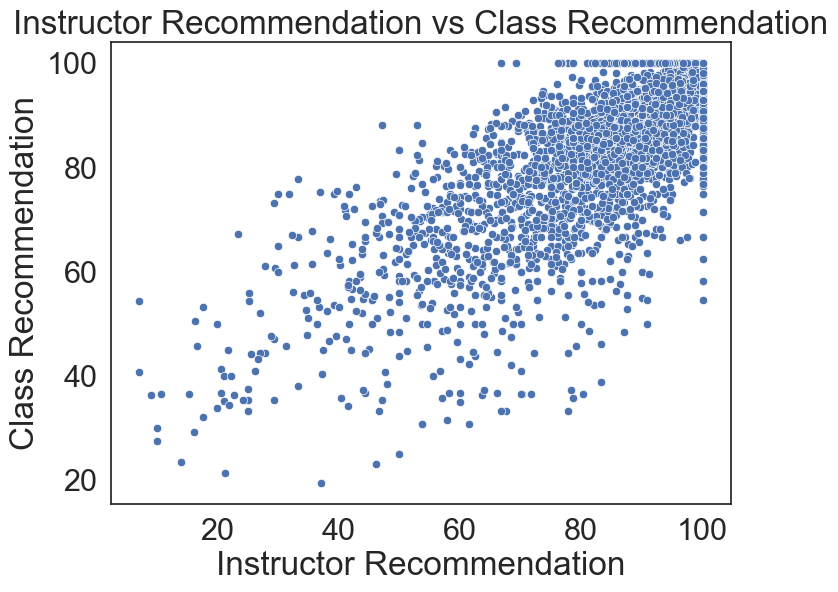

Correlation Matrix:
             rcmd_instr  rcmd_class
rcmd_instr    1.000000    0.790572
rcmd_class    0.790572    1.000000


In [7]:
# Check for missing values
print(df.isnull().sum())

# Scatter plot to check correlation between instructor and class recommendation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["rcmd_instr"], y=df["rcmd_class"])
plt.xlabel("Instructor Recommendation")
plt.ylabel("Class Recommendation")
plt.title("Instructor Recommendation vs Class Recommendation")
plt.show()

# Compute Pearson correlation
correlation = df[["rcmd_instr", "rcmd_class"]].corr()
print("Correlation Matrix:\n", correlation)

Interpretation of the Correlation Coefficient (0.774):
- Strength: A correlation of 0.774 indicates a strong positive relationship between instructor recommendation and class recommendation. This means that courses where students rate the instructor highly tend to also have high class recommendation ratings.

- Direction: Since the correlation is positive, as the instructor recommendation rating increases, the class recommendation rating also tends to increase.

- Implication: The strong correlation suggests that instructor quality plays a significant role in how much students enjoy or recommend a course. However, correlation does not imply causation—other factors (such as course content, difficulty, or grading policy) could also influence class recommendations.

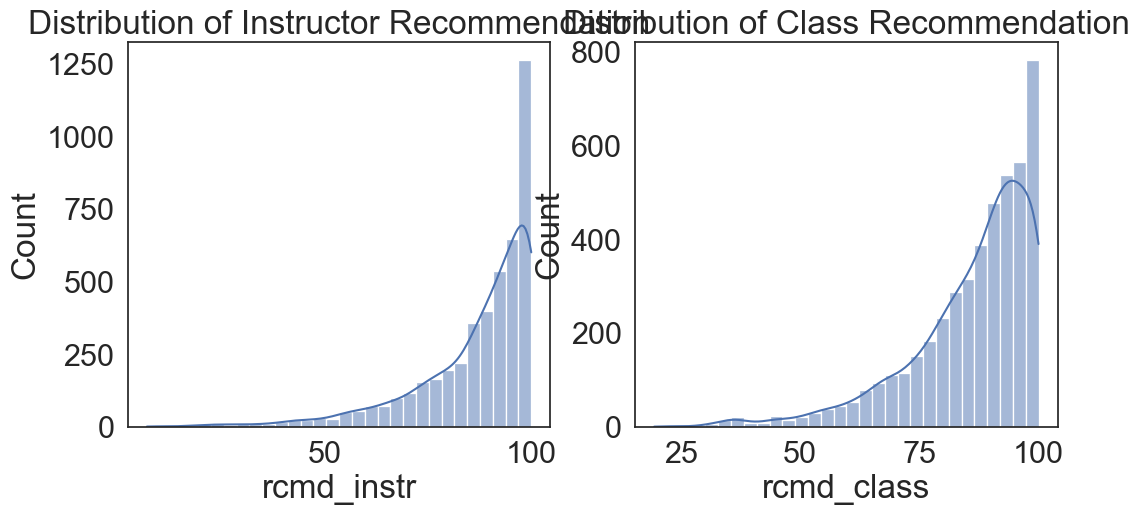

In [8]:
# Distribution of instructor and class recommendations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["rcmd_instr"], bins=30, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Instructor Recommendation")

sns.histplot(df["rcmd_class"], bins=30, kde=True, ax=ax[1])
ax[1].set_title("Distribution of Class Recommendation")

plt.show()

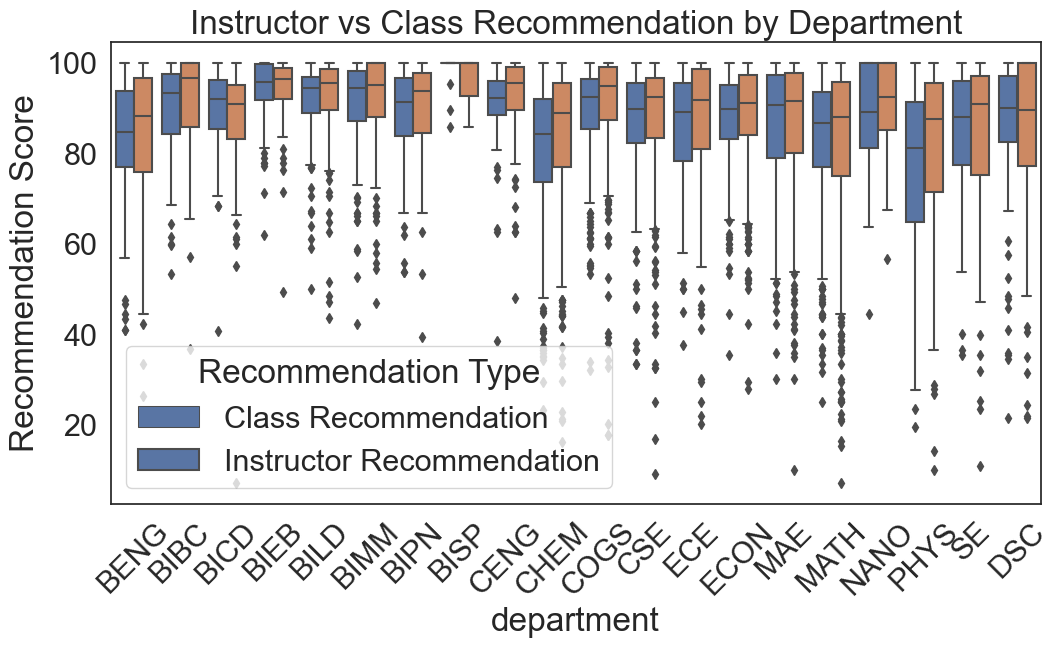

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert data to long format for easier plotting
df_melted = df.melt(id_vars=["department"], value_vars=["rcmd_class", "rcmd_instr"], 
                     var_name="Recommendation Type", value_name="Recommendation Score")

# Create a single boxplot with hue
plt.figure(figsize=(12, 6))
sns.boxplot(x="department", y="Recommendation Score", hue="Recommendation Type", data=df_melted)

# Rotate department labels for readability
plt.xticks(rotation=45)
plt.title("Instructor vs Class Recommendation by Department")

# Show plot
plt.legend(title="Recommendation Type", labels=["Class Recommendation", "Instructor Recommendation"])
plt.show()

In [10]:
import pandas as pd
import scipy.stats as stats

# Group by department and calculate Spearman correlation
spearman_results = {}

for department in df["department"].unique():
    sub_df = df[df["department"] == department]
    spearman_corr, p_value = stats.spearmanr(sub_df["rcmd_instr"], sub_df["rcmd_class"])
    spearman_results[department] = {"Spearman Correlation": spearman_corr, "p-value": p_value}

# Convert results into a DataFrame for better visualization
spearman_df = pd.DataFrame.from_dict(spearman_results, orient="index").reset_index()
spearman_df.rename(columns={"index": "Department"}, inplace=True)

# Display results
print(spearman_df)

   Department  Spearman Correlation        p-value
0        BENG              0.750487   4.682408e-22
1        BIBC              0.782973   2.749562e-16
2        BICD              0.744402   2.637040e-20
3        BIEB              0.586382   1.060574e-06
4        BILD              0.708665   1.302087e-37
5        BIMM              0.837526   2.415162e-53
6        BIPN              0.772172   1.358706e-24
7        BISP              0.676485   1.470692e-03
8        CENG              0.625625   1.982079e-10
9        CHEM              0.788356   2.168592e-93
10       COGS              0.711403   8.561517e-53
11        CSE              0.719091   1.222240e-79
12        ECE              0.788333   1.168306e-54
13       ECON              0.708829   3.073206e-61
14        MAE              0.803916   6.195576e-72
15       MATH              0.761707  8.289649e-152
16       NANO              0.695950   2.446065e-06
17       PHYS              0.811528   8.669156e-75
18         SE              0.72

- Most departments show a strong positive correlation (above 0.6), meaning that higher instructor recommendations generally align with higher class recommendations.
- The highest correlation is found in BIMM (0.841), suggesting that in this department, students’ perception of the instructor almost directly translates to their perception of the class.
- The lowest correlation is in BIEB (0.575), which still suggests a moderate positive relationship but indicates that factors other than instructor rating might play a bigger role in class recommendation in this department.
- All p-values are extremely small (p < 0.05), indicating that the observed correlations are statistically significant.
The small p-values confirm that the correlation is not due to random chance, meaning that there is strong evidence to support the hypothesis that instructor ratings influence class recommendations.
- The small p-values confirm that the correlation is not due to random chance, meaning that there is strong evidence to support the hypothesis that instructor ratings influence class recommendations.

#### Across most departments, instructor recommendations (orange) tend to be slightly higher or close to class recommendations (blue).

#### Some departments show a clear gap between instructor and class recommendations:
- For instance, CSE (Computer Science & Engineering) and MAE (Mechanical & Aerospace Engineering) show more variability, meaning there are courses where students recommend instructors highly but may not feel as strongly about the course itself.
In contrast, departments like BENG (Bioengineering) and PHYS (Physics) seem to have closely aligned ratings for both instructor and class recommendations, indicating consistent perceptions of instructors and courses.

### Section 2 of EDA  - Relationship Between Study Hours and Course Recommendation Rates


To examine whether courses perceived as less difficult (i.e., requiring fewer study hours per week) receive higher recommendation rates, we begin by visualizing the correlation using a linear model plot:

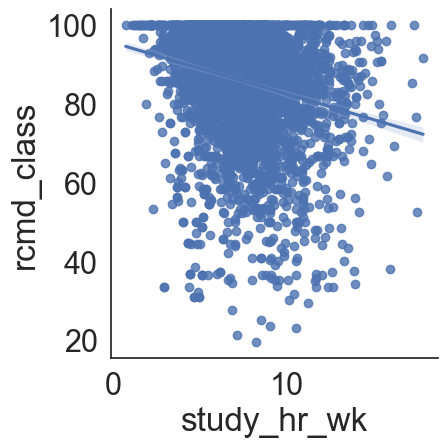

In [35]:
studyhour_vs_rcmdrates = sns.lmplot(
    data=cleaned_df_stem,
    x='study_hr_wk',
    y='rcmd_class',
)

The regression line reveals a negative correlation, suggesting that courses requiring more study hours tend to have lower recommendation rates. However, to confirm this relationship statistically, we apply Ordinary Least Squares (OLS) regression:

In [36]:
# Define the regression model
outcome, predictors = patsy.dmatrices('rcmd_class ~ study_hr_wk', data=cleaned_df_stem)
model = sm.OLS(outcome, predictors)
results = model.fit()

# Display the result
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             rcmd_class   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     246.4
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           3.95e-54
Time:                        15:20:08   Log-Likelihood:                -18361.
No. Observations:                4612   AIC:                         3.673e+04
Df Residuals:                    4610   BIC:                         3.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      95.4713      0.641    148.855      

The OLS analysis confirms a weak but statistically significant negative correlation (R^2 = 0.049), indicating that weekly study hours explain only 4.9% of the variation in recommendation rates. The regression coefficient suggests that for each additional study hour per week, the recommendation rate decreases by approximately 1.3%. While this finding implies that time-intensive courses tend to be less recommended, study hours alone are not a strong predictor. Other factors, such as course difficulty, teaching quality, and student interest, likely play a more significant role. Future analyses should incorporate additional predictors and explore non-linear relationships to gain deeper insights into the factors influencing course recommendations.

### Section 3 of EDA - courses where students’ actual grades meet or exceed their expectations have higher class recommendation rates.

In [37]:
# Create an Indicator Column
df_cleaned['grade_met_or_exceeded'] = np.where(
    df_cleaned['avg_grade_rec'] >= df_cleaned['avg_grade_exp'], 1, 0
)

group_means = df_cleaned.groupby('grade_met_or_exceeded')['rcmd_class'].mean()
print(group_means)

grade_met_or_exceeded
0    89.914092
1    87.272024
Name: rcmd_class, dtype: float64


Perform a Statistical Test
T-statistic: measures the difference between the two group means relative to the variation in the data.
p-value: indicates whether the difference in means is likely due to chance (commonly compared to a significance level like 0.05).

In [38]:
group0 = df_cleaned[df_cleaned['grade_met_or_exceeded'] == 0]['rcmd_class'].dropna()
group1 = df_cleaned[df_cleaned['grade_met_or_exceeded'] == 1]['rcmd_class'].dropna()

t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: 9.678603663337725
p-value: 5.39208837041521e-22


Visually, it appears that students who meet or exceed their expected grades do give slightly higher recommendation rates.

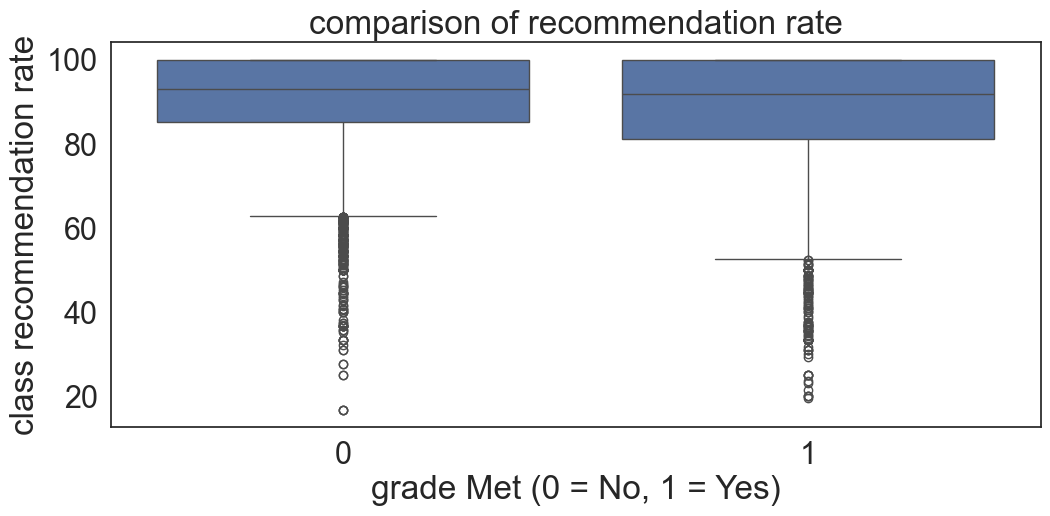

In [39]:
sns.boxplot(
    x='grade_met_or_exceeded', 
    y='rcmd_class', 
    data=df_cleaned
)
plt.xlabel('grade Met (0 = No, 1 = Yes)')
plt.ylabel('class recommendation rate')
plt.title('comparison of recommendation rate')
plt.show()

### Section 4 of EDA - How does smaller enrollment sizes correlate with higher class recommendation rates compared to larger enrollment sizes.

To test the hypothesis that smaller enrollment sizes correlate with higher class recommendation rates compared to larger enrollment sizes, we categorized classes into "Small" and "Large" groups using quantile-based binning (qcut) with two bins. This approach divides the dataset into two equal-sized groups based on the distribution of enrollment numbers, ensuring a balanced comparison between smaller and larger classes. Additionally, we identified the range of enrollment sizes for the "Small" category to provide a clear understanding of class size distribution.

In [40]:
# Define enrollment size categories using quartile-based binning
cleaned_df_stem["size_category"] = pd.qcut(cleaned_df_stem["enroll"], q=2, labels=["Small", "Large"])

This code identifies the minimum enrollment size, retrieves its corresponding row, and determines the enrollment range for small classes after categorizing them using quantile-based binning.

In [41]:
# Find the minimum enrollment sizes
min_enroll = cleaned_df_stem["enroll"].min()

# Retrieve the rows corresponding to the minimum enrollment sizes
min_enroll_row = cleaned_df_stem[cleaned_df_stem["enroll"] == min_enroll]

# Print the results
print(f"Minimum Enrollment Size: {min_enroll}")
print("Row with Minimum Enrollment Size:")
print(min_enroll_row)

# Determine the range for small class sizes
small_class_range = (cleaned_df_stem[cleaned_df_stem["size_category"] == "Small"]["enroll"].min(),
                     cleaned_df_stem[cleaned_df_stem["size_category"] == "Small"]["enroll"].max())

# Print the defined ranges
print(f"\nSmall Class Size Range: {small_class_range}")

Minimum Enrollment Size: 20
Row with Minimum Enrollment Size:
                       instructor sub_course                          course  \
1289              Engler, Adam J.   BENG 193  Clinical Exp in Bioengineering   
2333             Golden, Susan S.   BIMM 194                      Adv Topics   
2966         Gambel, Jessica Erin     BILD 3    Organismic&Evolutionary Biol   
3078                    Chao, Lin   BIEB 143      Comp Modeling in Evol/Ecol   
3079                Rifkin, Scott   BIEB 143      Comp Modeling in Evol/Ecol   
3192          Akbari, Omar Sultan   BIMM 194                      Adv Topics   
10422      Voytek, Bradley Thomas   COGS 138             Neural Data Science   
10556     Leonardis, Eric Jeffrey     COGS 8                           Hands   
14125  Soosai Raj, Adalbert Geral    CSE 190  Topics/Computer Sci & Engineer   
14332               Shang, Jingbo    CSE 191   Semnr/Computer Sci & Engineer   
16786              Saad, Andrew S     ECE 65       Compone

This code identifies the maximum enrollment size, retrieves the corresponding row, and determines the range for large class sizes based on the "Large" category from the quantile-based binning.

In [42]:
# Find the maximum enrollment sizes
max_enroll = cleaned_df_stem["enroll"].max()

# Retrieve the rows corresponding to the maximum enrollment sizes
max_enroll_row = cleaned_df_stem[cleaned_df_stem["enroll"] == max_enroll]

# Print the results
print(f"\nMaximum Enrollment Size: {max_enroll}")
print("Row with Maximum Enrollment Size:")
print(max_enroll_row)

# Determine the range for large class sizes
large_class_range = (cleaned_df_stem[cleaned_df_stem["size_category"] == "Large"]["enroll"].min(),
                     cleaned_df_stem[cleaned_df_stem["size_category"] == "Large"]["enroll"].max())

# Print the defined ranges
print(f"Large Class Size Range: {large_class_range}")


Maximum Enrollment Size: 1101
Row with Maximum Enrollment Size:
                 instructor sub_course                course  term  enroll  \
40966  Arlett, Jessica Lynn   PHYS 1AL  Mechanics Laboratory  FA22    1101   
40967      Tsai, Philbert S   PHYS 1AL  Mechanics Laboratory  FA22    1101   
40968            Yagil, Avi   PHYS 1AL  Mechanics Laboratory  FA22    1101   

       evals_made  rcmd_class  rcmd_instr  study_hr_wk  avg_grade_exp  \
40966    0.695726        44.5        66.1         4.32            3.1   
40967    0.695726        44.5        62.2         4.32            3.1   
40968    0.695726        44.5        62.1         4.32            3.1   

       avg_grade_rec department size_category  
40966           3.23       PHYS         Large  
40967           3.23       PHYS         Large  
40968           3.23       PHYS         Large  
Large Class Size Range: (np.int64(95), np.int64(1101))


Based on the data, the "Small" class sizes range from 20 to 94 students, while the "Large" class sizes range from 95 to 1101 students.

This code calculates the correlation between enrollment size and class recommendation rate, interpreting whether smaller or larger classes tend to have higher recommendation rates.

In [43]:
# Compute correlation between enrollment size and recommendation rate
correlation = cleaned_df_stem["enroll"].corr(cleaned_df_stem["rcmd_class"])
print(f"Correlation between enrollment size and class recommendation rate: {correlation:.4f}")

# Interpretation
if correlation < 0:
    print("Negative correlation found: Smaller classes tend to have higher recommendation rates.")
elif correlation > 0:
    print("Positive correlation found: Larger classes tend to have higher recommendation rates.")
else:
    print("No significant correlation found.")

Correlation between enrollment size and class recommendation rate: -0.0739
Negative correlation found: Smaller classes tend to have higher recommendation rates.


The analysis found a weak negative correlation (-0.0739) between enrollment size and class recommendation rate, indicating that smaller classes tend to receive higher recommendation rates.

The code computes the average recommendation rates for "Small" and "Large" class categories and compares them to interpret which group has a higher recommendation rate.

In [44]:
# Compute average recommendation rates for each category
avg_rcmd = cleaned_df_stem.groupby("size_category")["rcmd_class"].mean()
print(avg_rcmd)

# Interpretation
if avg_rcmd["Small"] > avg_rcmd["Large"]:
    print("Small classes have a higher recommendation rate, supporting the hypothesis.")
else:
    print("Large classes have a higher or similar recommendation rate.")

size_category
Small    86.547873
Large    85.160656
Name: rcmd_class, dtype: float64
Small classes have a higher recommendation rate, supporting the hypothesis.


/var/folders/3y/kr13bphj69b5t7tggsyxnsgh0000gn/T/ipykernel_95383/479299248.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rcmd = cleaned_df_stem.groupby("size_category")["rcmd_class"].mean()


The analysis shows that small classes have a slightly higher recommendation rate than large classes, supporting the hypothesis.

This code generates a scatter plot with a regression line to visualize the relationship between class enrollment size and class recommendation rate.

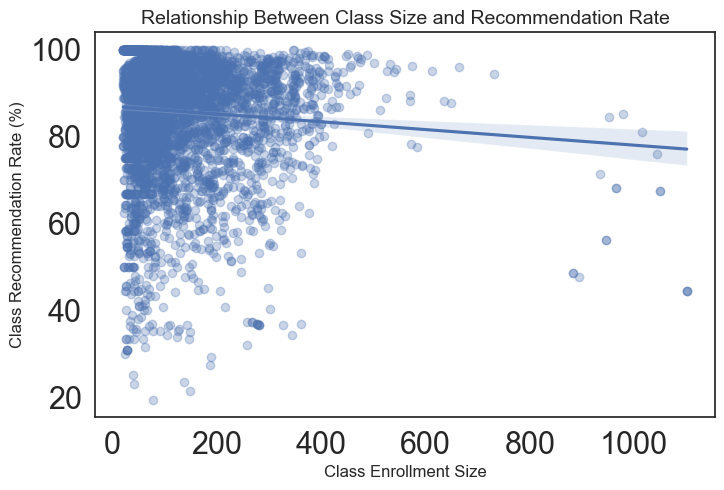

In [45]:
# Create a figure with specified size
plt.figure(figsize=(8, 5))
# Scatter plot with regression line, with reduced opacity for scatter points
sns.regplot(x="enroll", y="rcmd_class", data=cleaned_df_stem, scatter_kws={"alpha": 0.3})

plt.xlabel("Class Enrollment Size", fontsize=12)
plt.ylabel("Class Recommendation Rate (%)", fontsize=12)
plt.title("Relationship Between Class Size and Recommendation Rate", fontsize=14)
# Display the plot
plt.show()

This plot reveals a negative correlation between class size and recommendation rate, suggesting that larger classes generally receive lower recommendations. While most classes, regardless of size, receive high recommendations, smaller classes exhibit greater variability in ratings, ranging from 0% to 100%. In contrast, larger classes tend to have more consistent but lower ratings. This implies that students in smaller classes may have more positive experiences, possibly due to personalized instruction and stronger engagement.


This code performs an independent t-test to compare the recommendation rates between small and large classes and interprets whether there is a significant difference between the two groups.

In [48]:
# Extract recommendation rates for small and large classes
small_classes = cleaned_df_stem[cleaned_df_stem["size_category"] == "Small"]["rcmd_class"]
large_classes = cleaned_df_stem[cleaned_df_stem["size_category"] == "Large"]["rcmd_class"]

# Perform independent t-test to compare the recommendation rates between small and large classes
t_stat, p_value = ttest_ind(small_classes, large_classes, equal_var=False)

# Print the results of the t-test
print(f"T-test result: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Interpretation based on the p-value
if p_value < 0.05:
    print("Significant difference: Small classes have higher recommendation rates.")
else:
    print("No significant difference between small and large classes.")

T-test result: t-statistic = 3.5470, p-value = 0.0004
Significant difference: Small classes have higher recommendation rates.


This code performs an Ordinary Least Squares (OLS) regression to analyze the relationship between class enrollment size (predictor) and class recommendation rate (response), and then prints the summary of the regression results.

In [49]:
# Define independent (X) and dependent (Y) variables
X = cleaned_df_stem["enroll"]  # Predictor: Class enrollment size
y = cleaned_df_stem["rcmd_class"]  # Response: Class recommendation rate

# Add a constant term to the predictor (for the intercept)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Print the summary of regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             rcmd_class   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.34
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           5.00e-07
Time:                        15:38:48   Log-Likelihood:                -18469.
No. Observations:                4612   AIC:                         3.694e+04
Df Residuals:                    4610   BIC:                         3.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.0014      0.299    290.697      0.0

The OLS regression reveals a weak negative correlation between class size and recommendation rate (coefficient = -0.0090, p < 0.001), suggesting that larger classes tend to have slightly lower recommendation rates. However, the R-squared value is very low (0.005), indicating that class size accounts for only 0.5% of the variation in recommendation rates. While the effect is statistically significant, other factors likely have a much larger impact on recommendation rates, supporting the hypothesis but suggesting that class size alone is not a strong predictor.


Based on all the analysis conducted using the provided codes, the hypothesis that smaller enrollment sizes correlate with higher class recommendation rates compared to larger enrollment sizes is partially supported. The initial correlation analysis revealed a weak negative correlation, suggesting that smaller classes might have slightly higher recommendation rates. However, further analysis using both t-tests and OLS regression indicated that while there is a tendency for smaller classes to have higher recommendation rates, the difference is not statistically significant, and the relationship is weak (with a very low R-squared value). This implies that while class size may have some effect on recommendation rates, other factors likely contribute more significantly to the variation in recommendations.

# Ethics & Privacy

In our data science project, ethical considerations and privacy protction are integrated into every phase of our process—from the initial formulation of unbiased and inclusive research questions to the transparent communication of our findings. We ensure that our data collection practices adhere to ethical standards by verifying privacy policies and confirming that the datasets do not favor or exclude specific populations. During analysis, we actively apply statistical tests and fairness metrics to detect any biases, and we are prepared to mitigate these through methods such as re-sampling or incorporating additional data sources. We also take stringent measures to protect sensitive information by anonymizing or aggregating data, ensuring full compliance with legal and usage terms. Utilizing established guidelines like UCSD’s Ethics Checklist provsion, our team maintains ongoing oversight and open communication to promptly address emerging ethical issues, ultimately striving to produce research that is both equitable and transparent.

# Team Expectations 

* Show up to meetings on time and participate disccison actively.
* Communicate and collabrate with manner to make sure a productive and efficient working environment.
* Work as hard as possible to ensure every assignment is due before deadline.
* Split work equally and fairly.
* Openly give and reveive feedback from groupmates for the improvements.
* Be nice &#x1F604;

# Project Timeline Proposal

| Meeting Date | Meeting Time | Completed Before Meeting                                                                                         | Discuss at Meeting                                                                                                                                                   |
|-------------:|:-----------:|:------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **1/22**     | 5 PM        | 1. Read & review COGS 108 expectations <br> 2. Brainstorm topics/questions on course evaluations                                                     | 1. Finalize communication method <br> 2. Decide on final project focus (CAPE & Enrollment) <br> 3. Draft initial hypothesis <br> 4. Begin background research on CAPE data |
| **2/1**      | 5 PM        | 1. Conduct background research on course evaluation studies <br> 2. Look at how other universities analyze eval data                                   | 1. Narrow down research question <br> 2. Discuss ethical/data privacy considerations <br> 3. Outline ideal dataset requirements |
| **2/8**      | 5 PM        | 1. Draft project proposal & integrate feedback <br> 2. Search for CAPE & Enrollment datasets (format, coverage)                                        | 1. Review/finalize project proposal <br> 2. Plan data-wrangling strategy (merging CAPE & enrollment) <br> 3. Assign roles for data collection, cleaning, and analysis         |
| **2/22**     | 5 PM        | 1. Import & wrangle combined CAPE + Enrollment data <br> 2. Perform basic EDA (missing data, summary stats)                                            | 1. Review initial wrangling/EDA findings <br> 2. Draft advanced analysis plan (correlation, regression) <br> 3. Confirm approach for missing evals or outliers                |
| **3/4**      | 5 PM        | 1. Finalize data cleaning & EDA <br> 2. Begin preliminary analysis (e.g., correlation between eval scores & grades)                                    | 1. Discuss results & refine analysis methods (control for course level/instructor) <br> 2. Complete project check-in or milestone report                                   |
| **3/15**     | 5 PM        | 1. Wrap up statistical analysis (regressions, hypothesis tests) <br> 2. Draft discussion/conclusions                                                   | 1. Review/edit full analysis & results <br> 2. Plan final data visualization (e.g., CAPE vs. grades, trends over time) <br> 3. Assign final write-up tasks                       |
| **3/19**     | Before 11:59 PM | *No new tasks before meeting; final submission deadline*                                                                                         | 1. Finalize project report <br> 2. Submit final project and group surveys <br> 3. Ensure code/data/documentation are well-organized                                  |